   # IMPLEMENTING LOGISTIC REGRESSION ALGORITHM

In [1]:
#import library packages
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load given dataset
data = pd.read_csv("data.csv")

In [4]:
df = data.dropna()

In [5]:
del df['id']

In [6]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [9]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='diagnosis', axis=1)
#Response variable
y = df.loc[:,'diagnosis']  

In [10]:
#Splitting for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  398
Number of test dataset:  171
Total number of dataset:  569


##### Implementing LogR Algo

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

Training

In [12]:
LogR = LogisticRegression()
LogR.fit(X_train,y_train)
predicted = LogR.predict(X_test)

Finding Accuracy

In [13]:
accuracy = accuracy_score(y_test,predicted)
print('Accuracy of Logistic Regression',accuracy*100)

Accuracy of Logistic Regression 89.47368421052632


Finding Clasiification Report

In [14]:
cr = classification_report(y_test,predicted)
print('Classification report\n\n',cr)

Classification report

               precision    recall  f1-score   support

           B       0.90      0.93      0.92       107
           M       0.88      0.83      0.85        64

    accuracy                           0.89       171
   macro avg       0.89      0.88      0.89       171
weighted avg       0.89      0.89      0.89       171



Finding Confusion matrix

In [15]:
cm = confusion_matrix(y_test,predicted)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[100   7]
 [ 11  53]]


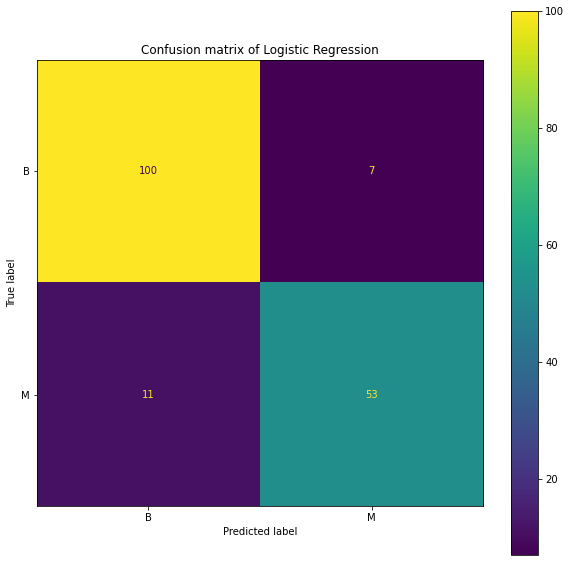

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(LogR, X_test, y_test, ax=ax)
plt.title('Confusion matrix of Logistic Regression')
plt.show()

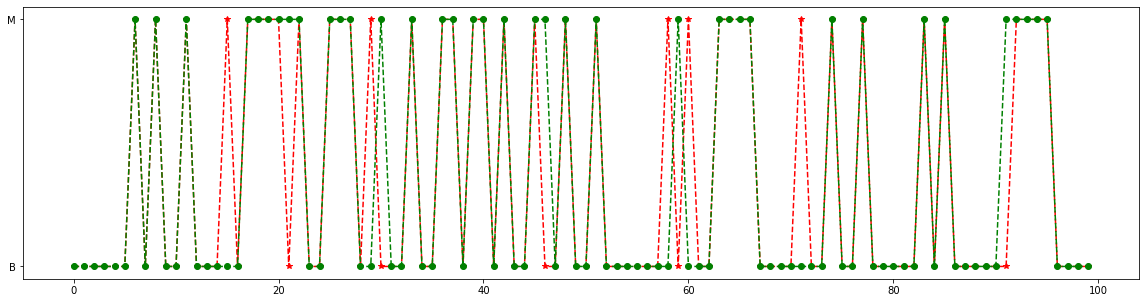

In [17]:
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='*', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()